In [1]:
#print(_doc_)
#code source:Jaques Grobler
#
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
diabetes =datasets.load_diabetes()

In [4]:
print (diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [5]:
data=pd.DataFrame(diabetes.data, columns=[diabetes.feature_names])
target=pd.DataFrame(diabetes.target)
print(data.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

In [6]:
x=diabetes.data[:, np.newaxis, 2]
y=np.array(target)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)
lr=LinearRegression().fit(x_train, y_train)

In [13]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_:[[975.27698313]]
lr.intercept_: [152.07653297]


In [10]:
y_pred=lr.predict(x_test)

In [11]:
print('coefficient of Determination R squared: %.2f' % r2_score(y_test, y_pred))

coefficient of Determination R squared: 0.32


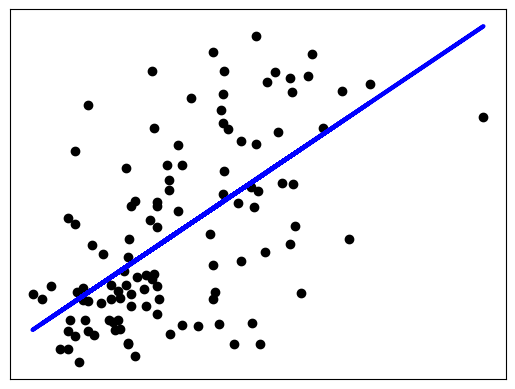

In [14]:
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [ ]:
def load_extended_boston():
    boston = datasets.load_boston()
    x = boston.data

x = MinMaxScaler().fit_transform(boston.data)
x = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
return x, boston.data

x, y=load_extended_boston()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
lr = LinearRegression().fit(x_train, y_train)

ridge = Ridge(alpha=1.0).fit(x_train, y_train)

print("Training set score: {:2f}".format(lr.score(x_train, y_train)))